# <span style='color:#D2691E'> Projet CSI4506 - Stock Market Prédiction - Type 2
-------------------------------------------------------------------------
Présenté à Caroline Barrière

Par: Groupe 1:

Miléna Dionne - 8916596

Samuel Bédard - 8780205

Le marché boursier fortement connu sous le terme de stock market est un vaste réseau d’échanges et de marchés ou des investissements font place régulièrement entre des compagnies et des investisseurs. De nos jours, ce marché est utilisé internationalement pour faire des échanges commerciaux entre divers nations. Il est reconnu que tous peuvent participer à la bourse, mais peu de gens savent où, quand, quoi, comment investir. Ainsi, notre but consiste à comparer certains de ces marchés pour trouver les meilleurs investissements pour l’année 2020.

Nous trouvons ce sujet important et intéressant comme il nous serait possible d’investir dans ce domaine par la suite si nos résultats sont concluants. Pour ce faire, nous avons utilisé le type 2, analyse comparative et empirique sur des approches de solutions à un problème d’IA.

Pour ce faire, nous avons choisi deux algorithmes à entrainer: 
- Régression forêt aléatoire
- Perceptron à plusieurs couches

Pour en savoir plus sur chaque algorithme, rendez-vous à la section Random Forest Regression ou Perceptron à plusieurs couches. 

Ce projet est fortement relié à notre cours d'IA puisque nous avons utilisé une algorithme et des fonctions vu en classe telle que la classification des données, la fonction de prédiction, l'entrainement sur des bases de données… Les notebooks faites en cours furent très utiles tout au long de notre projet surtout le notebook 4 pour l'implémentation, les prédictions et l'évaluation de nos modèles.

Pour la distribution de tâches, nous avons décidé de faire un algorithme par personne. Ainsi l’un de nous fera l’algorithme de Random Forest Regression et l’autre personne fera les testes avec le perceptron à plusieurs couches pour comparer les meilleurs investissements pour l’année 2020.

***
En premier lieu, nous avons regroupé l'ensemble des importations que nous avons eu recours dans notre projet. 

Nous avons fait usage de cinq packages: (1) scikit-learn, un très bon package pour l'apprentissage machine, (2) pandas, un package très utile pour les sciences des données, (3) matplotlib qui est très utile pour visualiser vos données (pip install matplotlib), (4) numpy pour apport des changements à notre dataset et (5) datetime pour convertir les dates à prédire en journée. Pour pouvoir exécuter le notebook, il est important de télécharger panda et scikit avec la commande: pip install sklearn et pip install pandas. Nous avons également importer les modèles et les instruction nécessaires dans notre notebook par la suite.

In [1]:
# Importation des packages pour l'analyse des données
import pandas as pd
import sklearn
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import csv

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.neural_network import MLPRegressor


## Obtenir le dataset

Pour tester nos algorithmes, nous avons décidé d'utiliser les bases de données de NASDAQ sur l'historique du marché boursier que nous pouvons percevoir dans le fichier data de ce projet. Les données prennent en considération les 10 dernières années de chaque companie. Au départ, nous voulions prendre les données de Google Finance, mais nous nous sommes apperçut qu'il n'est plus possible de télécharger les données de Google depuis 2018. Pour tester nos résultats, nous avons décidé de comparer 8 companies soit Apple, Microsoft, Amazone, Google, Facebook, Alibaba Group, JPMorgan Chase et Tencent. 
Il est possible de rajouter des compagnies à tester. 

Vous pouvez obtenir d'autres données à partir de ce lien: https://www.nasdaq.com/market-activity/quotes/historical.

De ces données, nous pouvons remarquer que les dernières entrées proviennet du 21 Novembre soit la date que nous avons importé les données. Sur le site, les données sont mise à jour quotidiennement. 

In [2]:
#Importer les données des stock_price 2009 jusqu'au 21 Novembre 2019

aapl = pd.read_csv("Data/HistoricalQuotes_AAPL.csv")
msft = pd.read_csv("Data/HistoricalQuotes_MSFT.csv")
amzn = pd.read_csv("Data/HistoricalQuotes_AMZN.csv")
google = pd.read_csv("Data/HistoricalQuotes_GOOGL.csv") #jusqu'en 2012
fb = pd.read_csv("Data/HistoricalQuotes_FB.csv")
baba = pd.read_csv("Data/HistoricalQuotes_BABA.csv") #jusqu'en 2014
jpm = pd.read_csv("Data/HistoricalQuotes_JPM.csv")
tcehy = pd.read_csv("Data/HistoricalQuotes_TCEHY.csv")

***Classifier et nettoyer les datasets***

In [41]:
aapl.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object


Après la génération de aapl.dtypes, nous pouvons remarquer que toutes les colonnes sont de type objet sauf volume. Ainsi, notre première tache consiste à changer les types de données à ceux recherchés soit float.

La fonction ci-dessous et la cellule qui l'a suit permet de formatter les données enfin de préparer les datasets aux testes. Il faut constater que nous pouvons exécuter la cellule qu'une seule fois à cause de l'instruction drop(). Celle ci permet d'effacer une rangée du dataset, ainsi une erreur se produit si la rangée n'est pas trouvée. 

In [1279]:
def preparedataset(name):
    name[' Close/Last'] = [s.replace('$', '') for s in name[' Close/Last']]
    name[' Low'] = [s.replace('$', '') for s in name[' Low']]
    name[' Open'] = [s.replace('$', '') for s in name[' Open']]
    name[' High'] = [s.replace('$', '') for s in name[' High']]
    
    name[' High'] = name[' High'].astype(float)
    name[' Low'] = name[' Low'].astype(float)
    name[' Close/Last'] = name[' Close/Last'].astype(float)
    name[' Open'] = name[' Open'].astype(float)

    name['oc_diff']=name[' Close/Last']-aapl[' Open']
    name.head()
    


In [1280]:
#executer cette cellule juste une fois à cause des astype 
# Initialiser la colonne 1 à la date pour permettre de représenter des graphiques sur le temps

preparedataset(aapl) 
aapl['Date'] = pd.to_datetime(aapl.Date,format='%m/%d/%Y')
aapl.index = aapl['Date']
aapl = aapl.drop(aapl.columns[[0]], axis=1)
aapl = aapl[: ' 2018-01-01']
 
preparedataset(msft)
msft['Date'] = pd.to_datetime(msft.Date,format='%m/%d/%Y')
msft.index = msft['Date']
msft = msft.drop(msft.columns[[0]], axis=1)
msft = msft[: ' 2018-01-01']

preparedataset(amzn)
amzn['Date'] = pd.to_datetime(amzn.Date,format='%m/%d/%Y')
amzn.index = amzn['Date']
amzn = amzn.drop(amzn.columns[[0]], axis=1)
amzn = amzn[: ' 2018-01-01']

preparedataset(google)
google['Date'] = pd.to_datetime(google.Date,format='%m/%d/%Y')
google.index = google['Date']
google = google.drop(google.columns[[0]], axis=1)
google = google[: ' 2018-01-01']

preparedataset(fb)
fb['Date'] = pd.to_datetime(fb.Date,format='%m/%d/%Y')
fb.index = fb['Date']
fb = fb.drop(fb.columns[[0]], axis=1)
fb = fb[: ' 2018-01-01']

preparedataset(baba)
baba['Date'] = pd.to_datetime(baba.Date,format='%m/%d/%Y')
baba.index = baba['Date']
baba = baba.drop(baba.columns[[0]], axis=1)
baba = baba[: ' 2018-01-01']

preparedataset(jpm)
jpm['Date'] = pd.to_datetime(jpm.Date,format='%m/%d/%Y')
jpm.index = jpm['Date']
jpm = jpm.drop(jpm.columns[[0]], axis=1)
jpm = jpm[: ' 2018-01-01']

preparedataset(tcehy)
tcehy['Date'] = pd.to_datetime(tcehy.Date,format='%m/%d/%Y')
tcehy.index = tcehy['Date']
tcehy = tcehy.drop(tcehy.columns[[0]], axis=1)
tcehy = tcehy[: ' 2018-01-01']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexes/base.py:3597: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [1281]:
#Rentrer le dataset que vous voulez afficher, ici nous prenons exemple sur aapl 
print(aapl)
#print(...)

             Close/Last    Volume    Open     High       Low  oc_diff
Date                                                                 
2019-11-21       262.01  30348780  263.69  264.005  261.1800    -1.68
2019-11-20       263.19  26609920  265.54  266.083  260.4000    -2.35
2019-11-19       266.29  19069600  267.90  268.000  265.3926    -1.61
2019-11-18       267.10  21700900  265.80  267.430  264.2300     1.30
2019-11-15       265.76  25093670  263.68  265.780  263.0100     2.08
...                 ...       ...     ...      ...       ...      ...
2018-01-08       174.35  20523870  174.35  175.610  173.9300     0.00
2018-01-05       175.00  23589930  173.44  175.370  173.0500     1.56
2018-01-04       173.03  22342650  172.54  173.470  172.0800     0.49
2018-01-03       172.23  29461040  172.53  174.550  171.9600    -0.30
2018-01-02       172.26  25400540  170.16  172.300  169.2600     2.10

[477 rows x 6 columns]


***Représentation graphique des données brousiers pour chaque companie du 1er janvier 2018 au 21 novembre 2019***

Bien que nous avons importé les prix boursiers des 10 dernières années. En programmant cette partie, j'ai pu remarquer que comparer les prix sur les 10 dernières années n'auraient pas été réaliste puisque la fluctuation des prix en 10 ans est toujours exponentielle ce qui aurait causé des erreurs dans la prédiction et une moins bonne accuracy. Ainsi, nous avons décidé de prendre les données des 2 dernières années pour entraîner nos modèles. 

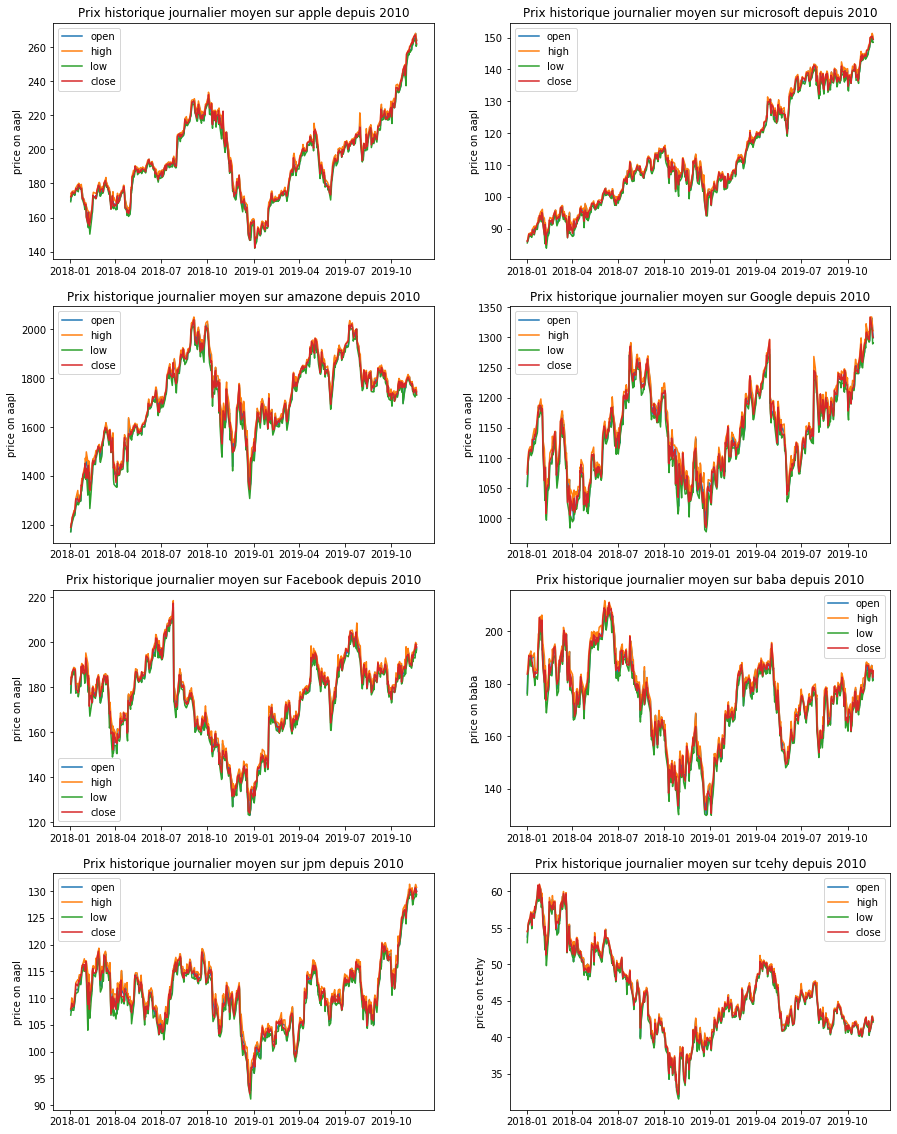

In [1282]:

plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
plt.plot(aapl[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on aapl')
plt.title('Prix historique journalier moyen sur apple depuis 2010')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,2)
plt.plot(msft[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on aapl')
plt.title('Prix historique journalier moyen sur microsoft depuis 2010')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,3)
plt.plot(amzn[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on aapl')
plt.title('Prix historique journalier moyen sur amazone depuis 2010')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,4)
plt.plot(google[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on aapl')
plt.title('Prix historique journalier moyen sur Google depuis 2010')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,5)
plt.plot(fb[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on aapl')
plt.title('Prix historique journalier moyen sur Facebook depuis 2010')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,6)
plt.plot(baba[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on baba')
plt.title('Prix historique journalier moyen sur baba depuis 2010')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,7)
plt.plot(jpm[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on aapl')
plt.title('Prix historique journalier moyen sur jpm depuis 2010')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,8)
plt.plot(tcehy[[' Open',' High',' Low',' Close/Last']])
plt.ylabel('price on tcehy')
plt.title('Prix historique journalier moyen sur tcehy depuis 2010')
plt.legend(['open','high','low','close'])

***Représentation graphique des prix brousiers pour chaque companie du 1er janvier 2018 au 21 novembre 2019***

Ici, j'ai implémenté la colonne daily_avg qui permet de calculer la moyenne quotidienne de chaque compagnie, avec les valeurs de notre dataset low, high, open et close. 

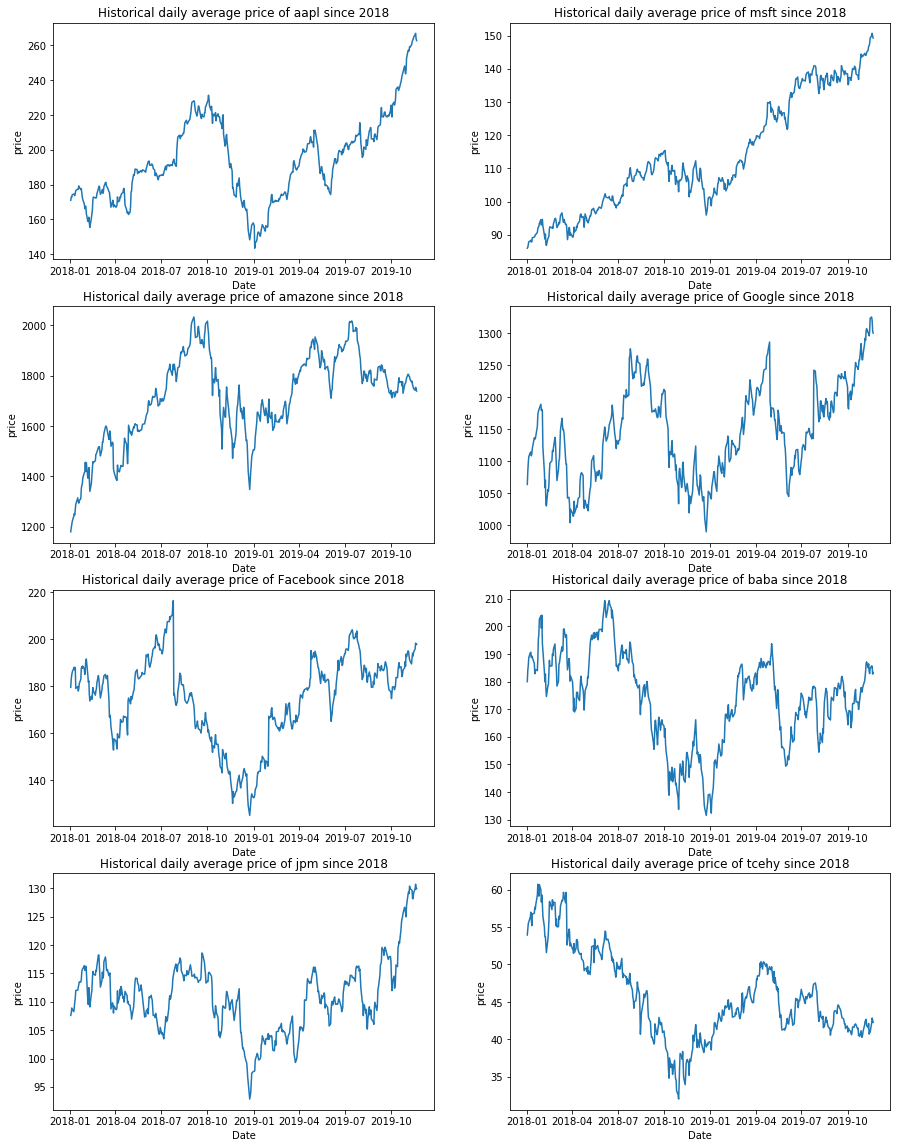

In [1283]:
#Représentation du montant journalier moyen de 2010 à 2019
aapl['daily_avg'] = (aapl[' Open'] + aapl[' High'] + aapl[' Low'] + aapl[' Close/Last']) / 4
msft['daily_avg'] = (msft[' Open'] + msft[' High'] + msft[' Low'] + msft[' Close/Last']) / 4
amzn['daily_avg'] = (amzn[' Open'] + amzn[' High'] + amzn[' Low'] + amzn[' Close/Last']) / 4
google['daily_avg'] = (google[' Open'] + google[' High'] + google[' Low'] + google[' Close/Last']) / 4
fb['daily_avg'] = (fb[' Open'] + fb[' High'] + fb[' Low'] + fb[' Close/Last']) / 4
baba['daily_avg'] = (baba[' Open'] + baba[' High'] + baba[' Low'] + baba[' Close/Last']) / 4
jpm['daily_avg'] = (jpm[' Open'] + jpm[' High'] + jpm[' Low'] + jpm[' Close/Last']) / 4
tcehy['daily_avg'] = (tcehy[' Open'] + tcehy[' High'] + tcehy[' Low'] + tcehy[' Close/Last']) / 4

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
plt.plot(aapl[['daily_avg']])
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Historical daily average price of aapl since 2018')

plt.subplot(4,2,2)
plt.plot(msft[['daily_avg']])
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Historical daily average price of msft since 2018')

plt.subplot(4,2,3)
plt.plot(amzn[['daily_avg']])
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Historical daily average price of amazone since 2018')

plt.subplot(4,2,4)
plt.plot(google[['daily_avg']])
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Historical daily average price of Google since 2018')

plt.subplot(4,2,5)
plt.plot(fb[['daily_avg']])
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Historical daily average price of Facebook since 2018')

plt.subplot(4,2,6)
plt.plot(baba[['daily_avg']])
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Historical daily average price of baba since 2018')

plt.subplot(4,2,7)
plt.plot(jpm[['daily_avg']])
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Historical daily average price of jpm since 2018')

plt.subplot(4,2,8)
plt.plot(tcehy[['daily_avg']])
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Historical daily average price of tcehy since 2018')
plt.show()

**Préparation du dataset et prétraitement**

Nous ferons 3 étapes pour préparer les donnés pour l'expérimentation:  
1. Extraire l'attribut correspondant à la classe que nous voulons prédire pour en faire notre output
2. Séparer le dataset en ensemble d'entraînement et ensemble de test, soit janvier 2018 à juillet 2019 pour le train set et les quatre derniers mois (juiller 2019 au 21 novembre 2019) pour le test set. 
3. Nous avons églamenent construit l'ensemble forecast pour permettre de prédire les valeurs dans le futur sur les 4 prochains mois.  

In [1284]:
#Peut exécuter cette cellule une seule fois à cause de la méthode drop () 
aapl=aapl.drop(['oc_diff'], axis=1)
aapl['daily_avg_After_3months']=aapl['daily_avg'].shift(-120)
X_aapl = aapl.dropna().drop(['daily_avg_After_3months','daily_avg'], axis=1)
y_aapl = aapl.dropna()['daily_avg_After_3months']
x_train_aapl = X_aapl.tail(-120)
y_train_aapl = y_aapl.tail(-120)
x_test_aapl = X_aapl.head(120)
y_test_aapl = y_aapl.head(120)
#x_train_aapl, x_test_aapl, y_train_aapl, y_test_aapl = train_test_split(X_aapl, y_aapl, test_size=0.25, random_state=43)
X_forecast_aapl =  aapl.head(120).drop(['daily_avg_After_3months','daily_avg'], axis=1)

msft=msft.drop(['oc_diff'], axis=1)
msft['daily_avg_After_3months']=msft['daily_avg'].shift(-90)
X_msft = msft.dropna().drop(['daily_avg_After_3months','daily_avg'], axis=1)
y_msft = msft.dropna()['daily_avg_After_3months']
x_train_msft = X_msft.tail(-120)
y_train_msft = y_msft.tail(-120)
x_test_msft = X_msft.head(120)
y_test_msft = y_msft.head(120)
#x_train_aapl, x_test_aapl, y_train_aapl, y_test_aapl = train_test_split(X_aapl, y_aapl, test_size=0.25, random_state=43)
X_forecast_msft =  msft.head(120).drop(['daily_avg_After_3months','daily_avg'], axis=1)

amzn=amzn.drop(['oc_diff'], axis=1)
amzn['daily_avg_After_3months']=amzn['daily_avg'].shift(-120)
X_amzn = amzn.dropna().drop(['daily_avg_After_3months','daily_avg'], axis=1)
y_amzn = amzn.dropna()['daily_avg_After_3months']
x_train_amzn = X_amzn.tail(-120)
y_train_amzn = y_amzn.tail(-120)
x_test_amzn = X_amzn.head(120)
y_test_amzn = y_amzn.head(120)
#x_train_amzn, x_test_amzn, y_train_amzn, y_test_amzn = train_test_split(X_amzn, y_amzn, test_size=0.25, random_state=43)
X_forecast_amzn =  amzn.head(120).drop(['daily_avg_After_3months','daily_avg'], axis=1)

google=google.drop(['oc_diff'], axis=1)
google['daily_avg_After_3months']=google['daily_avg'].shift(-120)
X_google = google.dropna().drop(['daily_avg_After_3months','daily_avg'], axis=1)
y_google = google.dropna()['daily_avg_After_3months']
x_train_google = X_google.tail(-120)
y_train_google = y_google.tail(-120)
x_test_google = X_google.head(120)
y_test_google = y_google.head(120)
#x_train_google, x_test_google, y_train_google, y_test_google = train_test_split(X_google, y_google, test_size=0.25, random_state=43)
X_forecast_google =  google.head(120).drop(['daily_avg_After_3months','daily_avg'], axis=1)

fb=fb.drop(['oc_diff'], axis=1)
fb['daily_avg_After_3months']=fb['daily_avg'].shift(-120)
X_fb = fb.dropna().drop(['daily_avg_After_3months','daily_avg'], axis=1)
y_fb = fb.dropna()['daily_avg_After_3months']
x_train_fb = X_fb.tail(-120)
y_train_fb = y_fb.tail(-120)
x_test_fb = X_fb.head(120)
y_test_fb = y_fb.head(120)
#x_train_fb, x_test_fb, y_train_fb, y_test_fb = train_test_split(X_fb, y_fb, test_size=0.25, random_state=43)
X_forecast_fb =  fb.head(120).drop(['daily_avg_After_3months','daily_avg'], axis=1)

baba=baba.drop(['oc_diff'], axis=1)
baba['daily_avg_After_3months']=baba['daily_avg'].shift(-120)
X_baba = baba.dropna().drop(['daily_avg_After_3months','daily_avg'], axis=1)
y_baba = baba.dropna()['daily_avg_After_3months']
x_train_baba = X_baba.tail(-120)
y_train_baba = y_baba.tail(-120)
x_test_baba = X_baba.head(120)
y_test_baba = y_baba.head(120)
#x_train_baba, x_test_baba, y_train_baba, y_test_baba = train_test_split(X_baba, y_baba, test_size=0.25, random_state=43)
X_forecast_baba =  baba.head(120).drop(['daily_avg_After_3months','daily_avg'], axis=1)

jpm=jpm.drop(['oc_diff'], axis=1)
jpm['daily_avg_After_3months']=jpm['daily_avg'].shift(-120)
X_jpm = jpm.dropna().drop(['daily_avg_After_3months','daily_avg'], axis=1)
y_jpm = jpm.dropna()['daily_avg_After_3months']
x_train_jpm = X_jpm.tail(-120)
y_train_jpm = y_jpm.tail(-120)
x_test_jpm = X_jpm.head(120)
y_test_jpm = y_jpm.head(120)
#x_train_jpm, x_test_jpm, y_train_jpm, y_test_jpm = train_test_split(X_jpm, y_jpm, test_size=0.25, random_state=43)
X_forecast_jpm =  jpm.head(120).drop(['daily_avg_After_3months','daily_avg'], axis=1)

tcehy=tcehy.drop(['oc_diff'], axis=1)
tcehy['daily_avg_After_3months']=tcehy['daily_avg'].shift(-120)
X_tcehy = tcehy.dropna().drop(['daily_avg_After_3months','daily_avg'], axis=1)
y_tcehy = tcehy.dropna()['daily_avg_After_3months']
x_train_tcehy = X_tcehy.tail(-120)
y_train_tcehy = y_tcehy.tail(-120)
x_test_tcehy = X_tcehy.head(120)
y_test_tcehy = y_tcehy.head(120)
#x_train_tcehy, x_test_tcehy, y_train_tcehy, y_test_tcehy = train_test_split(X_tcehy, y_tcehy, test_size=0.25, random_state=43)
X_forecast_tcehy =  tcehy.head(120).drop(['daily_avg_After_3months','daily_avg'], axis=1)


## Random Forest Regression 

La forêt d'arbres décisionnels, communément appelé forêt aléatoire ou Random Forest Regression en anglais, est très utilisé dans le monde des finances pour prédire des données. Random Forest, comme le nom le mentionne prend en considération de multiples arbres de possibilités qui forment une forêt. Celle-ci prend en considération plusieurs possibilités soit: est-ce que la prochaine valeur monte, descent, est négatif, est positif... .C'est un algorithme de classification en apprentissage machine. 

***Définition du classificateur de Random Forest Regression***   
On défini notre classificateur avec scikit learn.

In [43]:
clf = RandomForestRegressor(n_estimators=200)

***Entraîner du classificateur de régression logistique***  
Maintenant que notre modèle est défini, nous devons entraîner le modèle en utilisant l'ensemble d'entraînement pour prédire la classe *daily_avg_After_Month* pour trouver l'accuracy de nos ensembles. 

Dans le cas où l'ensemble à une mauvaise accuracy, nous pouvons changer les ensembles. 

Ainsi, au début, je voulais prédire les données pour l'année 2020 au complet, mais après avoir entrainer mon modèle je me suis apperçut qu'il était mieux d'utiliser un ensemble test plus petit pour avoir des données plus cohérents. 


In [1286]:
def train_model(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        
    }

    for name, clf in Regressor.items():
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        #accuracytrain = clf.score(X_train,y_train)
        #accuracytest = clf.score(X_test, y_test)
        
        error_test = abs(pred - y_test)
        
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error:', round(np.mean(error_test), 2), 'degrees.')
        
        # Calculate mean absolute percentage error (MAPE)
        mape_test = 100 * (error_test / y_test)

        #retourner les résultats 
        accuracy_test = 100 - np.mean(mape_test)
        print('Accuracy of the test set:', round(accuracy_test, 2), '%.')
        
    

In [1287]:
print("Random Forest Regressor on apple")
result_aapl = train_model(x_train_aapl, x_test_aapl, y_train_aapl, y_test_aapl)
print()

print("Random Forest Regressor on microsft")
result_msft = train_model(x_train_msft, x_test_msft, y_train_msft, y_test_msft)
print()

print("Random Forest Regressor on Amazon")
result_amzn = train_model(x_train_amzn, x_test_amzn, y_train_amzn, y_test_amzn)
print()

print("Random Forest Regressor on Google")
result_google = train_model(x_train_google, x_test_google, y_train_google, y_test_google)
print()

print("Random Forest Regressor on Facebook")
result_fb = train_model(x_train_fb, x_test_fb, y_train_fb, y_test_fb)
print()

print("Random Forest Regressor on jpm")
result_jpm = train_model(x_train_jpm, x_test_jpm, y_train_jpm, y_test_jpm)
print()

print("Random Forest Regressor on baba")
result_baba = train_model(x_train_baba, x_test_baba, y_train_baba, y_test_baba)
print()

print("Random Forest Regressor on tcehy")
result_tcehy = train_model(x_train_tcehy, x_test_tcehy, y_train_tcehy, y_test_tcehy)
print()


Random Forest Regressor on apple
Mean Absolute Error: 27.87 degrees.
Accuracy of the test set: 83.56 %.

Random Forest Regressor on microsft
Mean Absolute Error: 16.55 degrees.
Accuracy of the test set: 87.03 %.

Random Forest Regressor on Amazon
Mean Absolute Error: 177.23 degrees.
Accuracy of the test set: 89.99 %.

Random Forest Regressor on Google
Mean Absolute Error: 78.29 degrees.
Accuracy of the test set: 93.11 %.

Random Forest Regressor on Facebook
Mean Absolute Error: 25.16 degrees.
Accuracy of the test set: 84.78 %.

Random Forest Regressor on jpm
Mean Absolute Error: 6.87 degrees.
Accuracy of the test set: 93.29 %.

Random Forest Regressor on baba
Mean Absolute Error: 16.01 degrees.
Accuracy of the test set: 89.76 %.

Random Forest Regressor on tcehy
Mean Absolute Error: 3.08 degrees.
Accuracy of the test set: 92.86 %.



On peut s'apercevoir que les compagnies qui grimpent en flèche ont une moins bonne prédiction puisque random forest regressor prend en considération les données de 2018 à septembre 2019 

**Représentation graphiquale des ensembles d'entraînements avec les ensembles de prédictions**

Cette fonction permet de représenter visuellement les résultats obtenues pour la prédiction avec les données réelles. 

In [1288]:
def showpred(X_train, y_train, x_test, y_test):
    clf = RandomForestRegressor(n_estimators=200)
    clf.fit(X_train, y_train)
    
    #Comparaison des données réels avec ceux prédits pour le test set. 
    pred = clf.predict(x_test)
    prediction_df = x_test.drop([' Close/Last',' Open', ' Low', ' High', ' Volume'], axis=1)
    prediction_df["Price"] = pred
    y_test.columns = ['actual price']
    
    #Build graph with actual and predicted prices 
    (prediction_df).plot()
    (y_test).plot()
    plt.xlabel("Dates")
    plt.ylabel("Stock Prices")
    plt.title('Random Forest predicted prices for 2019')
    plt.legend(['Predicted Price', ' Actual Price'])
    plt.show()

    

prédiction des prédictions vs actuel pour apple sur les 3 dernier mois


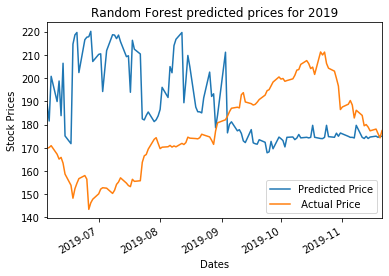


 prédiction des prédictions vs actuel pour microsoft sur les 3 derniers mois


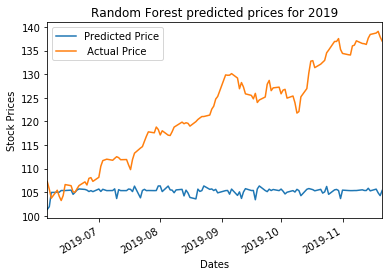


 prédiction des prédictions vs actuel pour amazone sur les 3 derniers mois


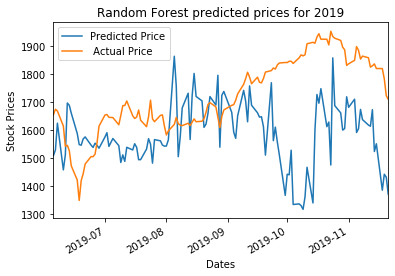


 prédiction des prédictions vs actuel pour Google sur les 3 derniers mois


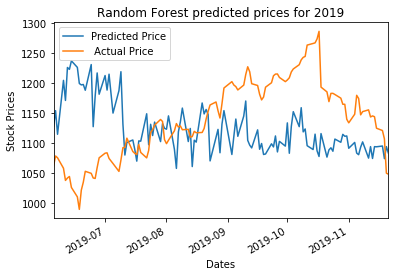


 prédiction des prédictions vs actuel pour Facebook sur les 3 derniers mois


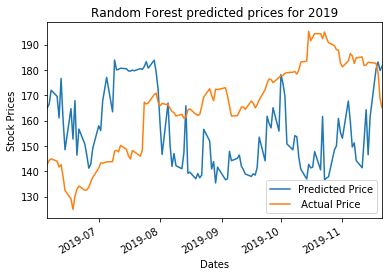


 prédiction des prédictions vs actuel pour JPM sur les 3 derniers mois


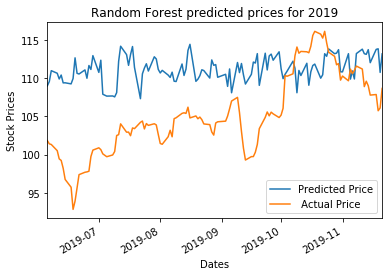


 prédiction des prédictions vs actuel pour BABA sur les 3 derniers mois


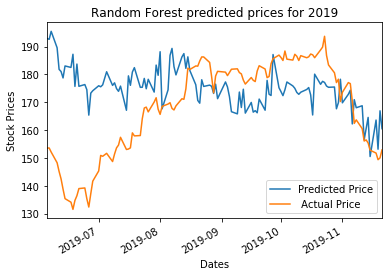


 prédiction des prédictions vs actuel pour TCEHY sur les 3 derniers mois 


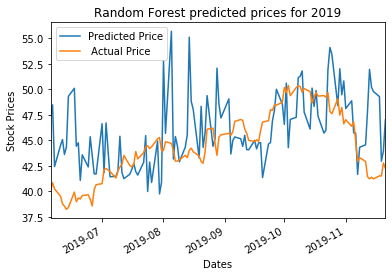

In [1289]:
print("prédiction des prédictions vs actuel pour apple sur les 3 dernier mois")
showpred(x_train_aapl, y_train_aapl, x_test_aapl, y_test_aapl)
print("\n","prédiction des prédictions vs actuel pour microsoft sur les 3 derniers mois")
showpred(x_train_msft, y_train_msft, x_test_msft, y_test_msft)
print("\n","prédiction des prédictions vs actuel pour amazone sur les 3 derniers mois")
showpred(x_train_amzn, y_train_amzn, x_test_amzn, y_test_amzn)
print("\n","prédiction des prédictions vs actuel pour Google sur les 3 derniers mois")
showpred(x_train_google, y_train_google, x_test_google, y_test_google)
print("\n","prédiction des prédictions vs actuel pour Facebook sur les 3 derniers mois")
showpred(x_train_fb, y_train_fb, x_test_fb, y_test_fb)
print("\n","prédiction des prédictions vs actuel pour JPM sur les 3 derniers mois")
showpred(x_train_jpm, y_train_jpm, x_test_jpm, y_test_jpm)
print("\n","prédiction des prédictions vs actuel pour BABA sur les 3 derniers mois")
showpred(x_train_baba, y_train_baba, x_test_baba, y_test_baba)
print("\n","prédiction des prédictions vs actuel pour TCEHY sur les 3 derniers mois ")
showpred(x_train_tcehy, y_train_tcehy, x_test_tcehy, y_test_tcehy)

On peut remarquer que l'ensemble d'entraînement est quasiment semblable à l'ensemble d'entraînement prédit. 

Toutefois, l'ensemble test n'est pas tout à fait pareil ainsi, nous pouvons réduire l'ensemble test pour avoir des données qui coordent mieux. 

### Prédiction des prix du random Forest Regression

In [1290]:
def prediction(X, y, X_forecast):
    model = RandomForestRegressor(n_estimators=200)
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target

In [1291]:
forecasted_aapl = prediction(X_aapl, y_aapl, X_forecast_aapl)
forecasted_msft = prediction(X_msft, y_msft, X_forecast_msft)
forecasted_amzn = prediction(X_amzn, y_amzn, X_forecast_amzn)
forecasted_google = prediction(X_google, y_google, X_forecast_google)
forecasted_fb = prediction(X_fb, y_fb, X_forecast_fb)
forecasted_baba = prediction(X_baba, y_baba, X_forecast_baba)
forecasted_jpm = prediction(X_jpm, y_jpm, X_forecast_jpm)
forecasted_tcehy = prediction(X_tcehy, y_tcehy, X_forecast_tcehy)

In [1292]:
def showpred(company, forecasted): 
    last_date=company.iloc[1].name
    modified_date = last_date + dt.timedelta(days=1)
    new_date = pd.date_range(modified_date,periods=120,freq='D')

    # assign prediction to newly defined index
    forecasted = pd.DataFrame(forecasted, columns=['daily_avg'], index=new_date)

    # combine historical price and predicted price
    company = pd.concat([company[['daily_avg']], forecasted])
    plt.figure(figsize=(15,8))
    (company[:-119]['daily_avg']).plot(label='Historical Price')
    (company[-120:]['daily_avg']).plot(label='Predicted Price')

    plt.xlabel('Time')
    plt.ylabel('Price in USD')
    plt.legend()
    plt.show()

                     Prédiction du prix moyen journalier sur Apple depuis 2018               


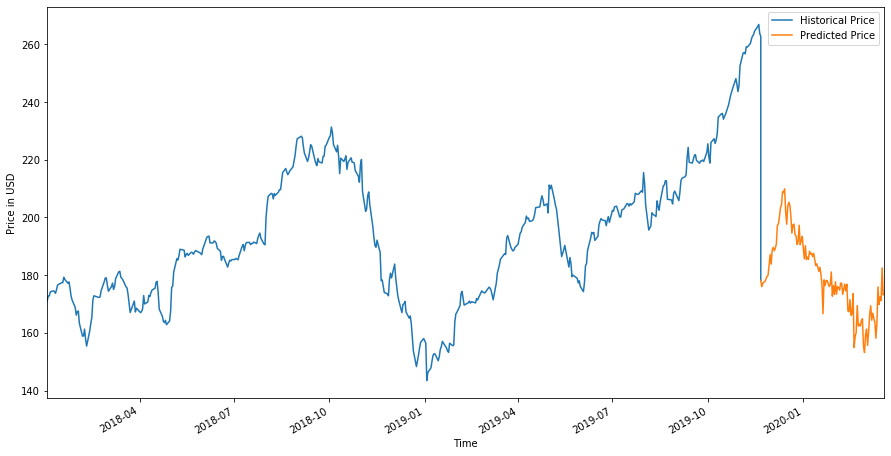

                     Prédiction du prix moyen journalier sur Microsoft depuis 2018               


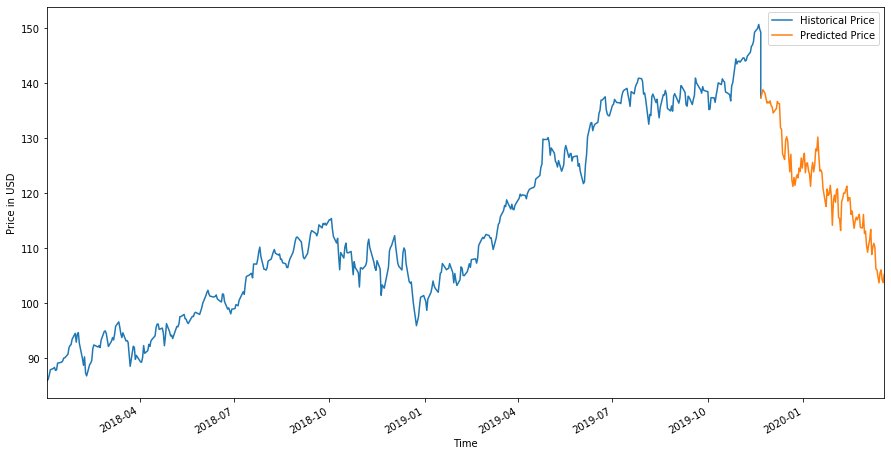

                     Prédiction du prix moyen journalier sur Amazone depuis 2018               


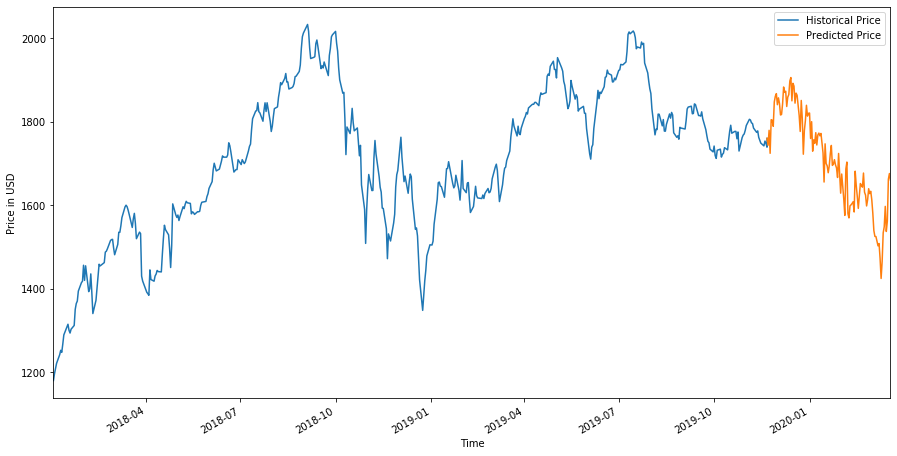

                     Prédiction du prix moyen journalier sur Facebook depuis 2018               


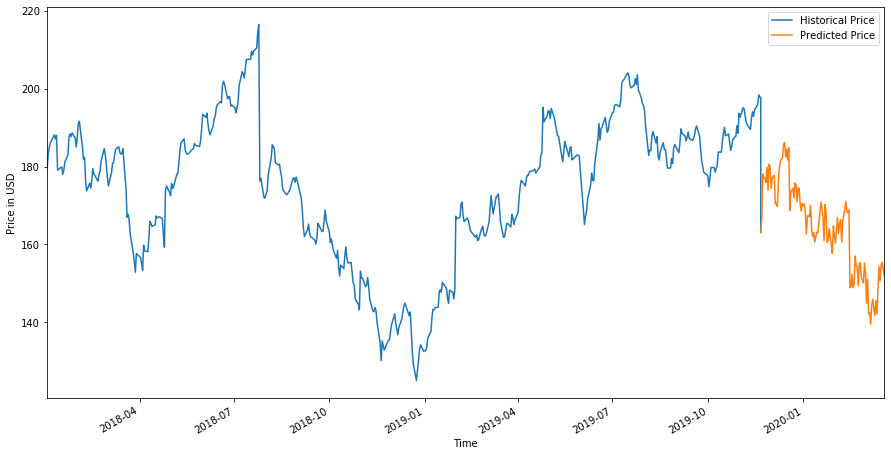

                     Prédiction du prix moyen journalier sur Google depuis 2018               


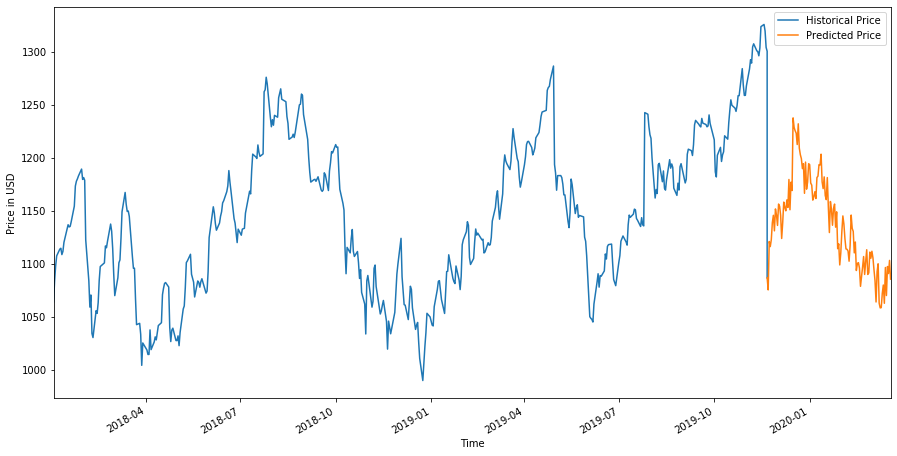

                     Prédiction du prix moyen journalier sur BABA depuis 2018               


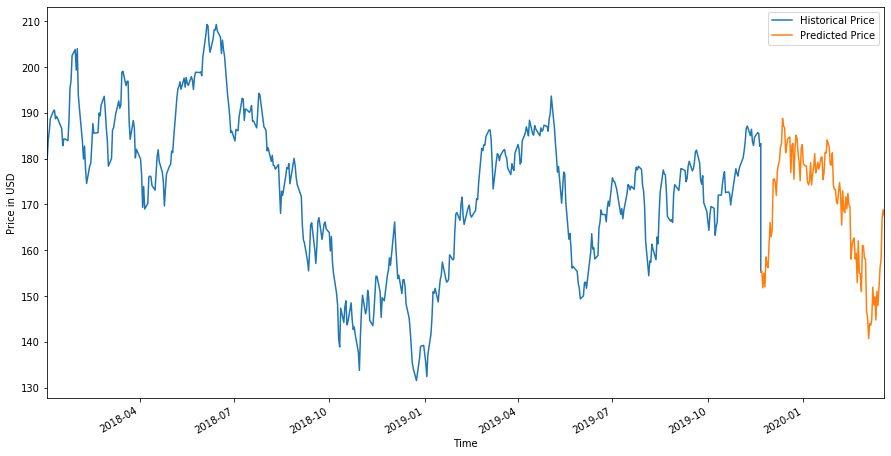

                     Prédiction du prix moyen journalier sur JPM depuis 2018               


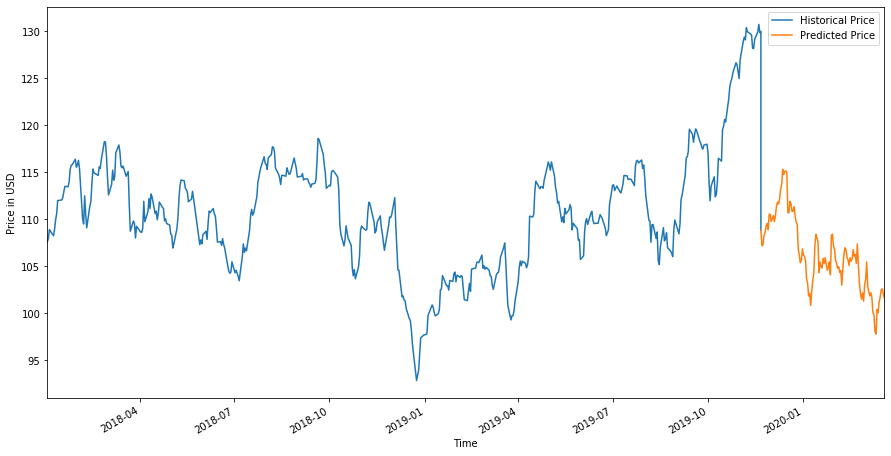

                     Prédiction du prix moyen journalier sur tcehy depuis 2018               


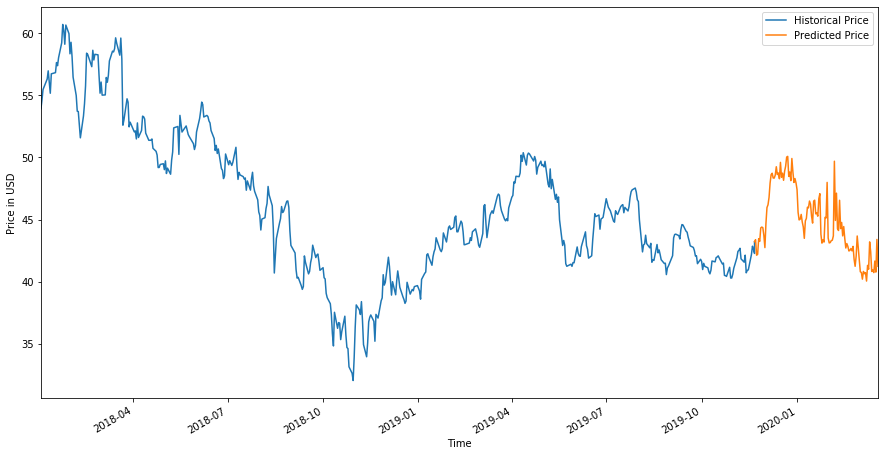

In [1293]:
print("                     Prédiction du prix moyen journalier sur Apple depuis 2018               ")
showpred(aapl, forecasted_aapl)
print("                     Prédiction du prix moyen journalier sur Microsoft depuis 2018               ")
showpred(msft, forecasted_msft)
print("                     Prédiction du prix moyen journalier sur Amazone depuis 2018               ")
showpred(amzn, forecasted_amzn)
print("                     Prédiction du prix moyen journalier sur Facebook depuis 2018               ")
showpred(fb, forecasted_fb)
print("                     Prédiction du prix moyen journalier sur Google depuis 2018               ")
showpred(google, forecasted_google)
print("                     Prédiction du prix moyen journalier sur BABA depuis 2018               ")
showpred(baba, forecasted_baba)
print("                     Prédiction du prix moyen journalier sur JPM depuis 2018               ")
showpred(jpm, forecasted_jpm)
print("                     Prédiction du prix moyen journalier sur tcehy depuis 2018               ")
showpred(tcehy, forecasted_tcehy)

Grâce au Random Forest Regression, nous avons pu trouvé les prédictions pour les quatres prochains mois de chaque companie de notre projet suit Apple, Microsoft, Amazone, Google, Facebook, BABA, JPM et tcehy. 

Toutefois, l'accuracy trouvé pour chaque algorithme n'était pas à son comble pour certaine compagnie puisque les valuers ont prit des courbes exponentielles positives pour Apple, Microsoft, JPM et Google. Comme Random Forest Regression prend en considération plusieurs contraintes d'une forêt vaste en prenant les valeurs qui sont le plus probable, lorsqu'il y a une forte hausse dans les derniers mois, l'algorithme prédit que c'est peu probable ainsi il va prédire des valeurs qui sont probables selon les deux dernières années. 

Parcontre, lorsque les compagnies n'ont pas obtenues de très grosses hausses, leurs prévisions sont plus probables. Ainsi, nous ponvons voir qu'il est probable que tcehy ait une hausse dans les quatre prochains mois. 

Ainsi, nous avons testé une autre algorithme pour trouver si les données sont plus cohérent avec une autre algorithme 

# perceptron multi couche


### Formating des datasets

In [34]:
def formatDataSet (dataset): 
    predict_1week = []
    future1week = []
    day1before = []
    day2before = []
    day3before = []
    day4before = []
    day5before = []
    day6before = []
    today = []
    date = []
    count = 7
    while(count < len(dataset)-14):
        future1week.append(dataset[' Close/Last'][count].replace('$',''))
        today.append(dataset[' Close/Last'][count+7].replace('$',''))
        day1before.append(dataset[' Close/Last'][count+8].replace('$',''))
        day2before.append(dataset[' Close/Last'][count+9].replace('$',''))
        day3before.append(dataset[' Close/Last'][count+10].replace('$',''))
        day4before.append(dataset[' Close/Last'][count+11].replace('$',''))
        day5before.append(dataset[' Close/Last'][count+12].replace('$',''))
        day6before.append(dataset[' Close/Last'][count+13].replace('$',''))
        date.append(dataset['Date'][count])
        count+= 1
    data = {'future1week':future1week, 
            'today':today,
            'day1before':day1before,
            'day2before':day2before,
            'day3before':day3before,
            'day4before':day4before,
            'day5before':day5before,
            'day6before':day6before,
            'date':date}
    return pd.DataFrame(data)

In [43]:
dataAapl = formatDataSet(aapl)
dataMsft = formatDataSet(msft)
dataAmzn = formatDataSet(amzn)

In [44]:
data = dataAapl
data.append(dataMsft)
data.append(dataAmzn)
data.pop('date')

0       11/12/2019
1       11/11/2019
2       11/08/2019
3       11/07/2019
4       11/06/2019
           ...    
2491    12/18/2009
2492    12/17/2009
2493    12/16/2009
2494    12/15/2009
2495    12/14/2009
Name: date, Length: 2496, dtype: object

Exemple de data

In [46]:
print(data)

     future1week     today day1before day2before day3before day4before  \
0         261.96    255.82     248.76     243.26     243.29     249.05   
1          262.2    248.76     243.26     243.29     249.05     246.58   
2         260.14    243.26     243.29     249.05     246.58     243.58   
3         259.43    243.29     249.05     246.58     243.58     243.18   
4         257.24    249.05     246.58     243.58     243.18     239.96   
...          ...       ...        ...        ...        ...        ...   
2491     27.9186   28.2571    27.1243    26.9928    27.6171    28.0686   
2492     27.4086   27.1243    26.9928    27.6171    28.0686    28.0328   
2493     27.8614   26.9928    27.6171    28.0686    28.0328    28.1386   
2494     27.7386   27.6171    28.0686    28.0328    28.1386    28.5586   
2495       28.14   28.0686    28.0328    28.1386    28.5586    28.6557   

     day5before day6before  
0        246.58     243.58  
1        243.58     243.18  
2        243.18     239.

### Testing des hidden layer size

#### training
cette méthode entraine un modele, elle est similaire à celle utiliser dans les notebooks a part pour quelque changement

In [19]:
def train_model(model, x_train, y_train, epoch=10):
    for i in range(1, epoch +1):
        model.fit(x_train,y_train)

#### testing
cette méthode test un modele et retourne un dictionnaire avec comme clef : l'erreur moyenne, la précision, la profondeur 'i', la hauteur 'j' et le nombre d'époch

In [8]:
def test_model(model, x_test, y_test, ie, je, epoch):
    y_predict = model.predict(x_test)
    y_test_list = y_test.tolist()
    today = x_test['today'].tolist()

    #error
    sum = 0
    for i in range(0, len(y_test_list) - 1):
        sum += abs((float(y_predict[i]) - float(y_test_list[i])) / float(y_test_list[i]))
    average_error = sum / len(y_test)

    #precision and recal
    tp = tn = fp = fn = 0

    for i in range(0, len(y_test) - 1):
        if((float(y_predict[i]) - float(today[i])) > 0 and (float(y_test_list[i]) - float(today[i])) > 0):
            tp += 1
        elif ((float(y_predict[i]) - float(today[i])) <= 0 and (float(y_test_list[i]) - float(today[i])) > 0):
            fn += 1
        elif ((float(y_predict[i]) - float(today[i])) > 0 and (float(y_test_list[i]) - float(today[i])) <= 0):
            fp += 1
        else:
            tn += 1
    try:
        return {
            "average error" : average_error,
            "precision" : tp/(tp+fp),
            "recal" : tp/(tp+fn),
            "i" : ie,
            "j" : je,
            "epoch" :  epoch
        }
    except ZeroDivisionError:
        return {
            "average error" : average_error,
            "precision" : 0,
            "recal" : 0,
            "i" : i,
            "j" : j,
            "epoch" :  epoch 
        }

### creating test and traning set pour tester le hiddent layer

In [9]:
y = data.pop("future1week").values
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)

### test differente valeur pour le hidden layer
le code qui suit prend quelque heure pour exécuter

In [ ]:
csv_file = 'resultTest.csv'

try:
    with open(csv_file,'w') as file:
        writer = csv.DictWriter(file, fieldnames=["average error","precision","recal", "i", "j", "epoch"])
        writer.writeheader()
        for i in range(5, 100, 5):
            print("trying: " + str(i) + " by X")
            for j in range(5, 100, 5):
                for epoch in range(10,100, 10):
                    model = MLPRegressor(hidden_layer_sizes = (i,j), solver = "adam", alpha=0.0001, max_iter=400, warm_start= True)
                    train_model(model,x_train,y_train, epoch=epoch)
                    resultIJ = test_model(model,x_test,y_test, i, j, epoch)
                    writer.writerow(resultIJ)
                    result.append(resultIJ)
except IOError:
    print("I/O error")

Les résultat ce trouve dans 'hiddentLayerTest' et les résutats ce trouve dans 'resultTest.csv'. Cependant les resultats comprene des ligne vide pour y remedier le fichier 'resultWithoutEmptyRow.csv' à les même valeur sans les ligne vides.

Pour analyser les résultats plus facilement un fichier excel à été créer qui contient une simple anayse avec un tableau croisé

avec les résultats obtenues nous avons décider de choisir un hidden layer de (95, 40) et 40 epoch

### testing avec d'autre paramètre

methode modifier pour tester d'autre effect de d'autre parametre

In [10]:
def test_model_modify(model, x_test, y_test, a, s, m):
    y_predict = model.predict(x_test)
    y_test_list = y_test.tolist()
    today = x_test['today'].tolist()

    #error
    sum = 0
    for i in range(0, len(y_test_list) - 1):
        sum += abs((float(y_predict[i]) - float(y_test_list[i])) / float(y_test_list[i]))
    average_error = sum / len(y_test)

    #precision and recal
    tp = tn = fp = fn = 0

    for i in range(0, len(y_test) - 1):
        if((float(y_predict[i]) - float(today[i])) > 0 and (float(y_test_list[i]) - float(today[i])) > 0):
            tp += 1
        elif ((float(y_predict[i]) - float(today[i])) <= 0 and (float(y_test_list[i]) - float(today[i])) > 0):
            fn += 1
        elif ((float(y_predict[i]) - float(today[i])) > 0 and (float(y_test_list[i]) - float(today[i])) <= 0):
            fp += 1
        else:
            tn += 1
    try:
        return {
            "average error" : average_error,
            "precision" : tp/(tp+fp),
            "recal" : tp/(tp+fn),
            "a" : a,
            "s" : s,
            "m" :  m
        }
    except ZeroDivisionError:
        return {
            "average error" : average_error,
            "precision" : 0,
            "recal" : 0,
            "a" : a,
            "s" : s,
            "m" :  m 
        }

In [ ]:
cette partie de code test des variation des parametres comme le solver, le alpha et le max_iter

In [20]:
hiddent_layer = (95, 40)
epoch = 40
result = []
solver = ['lbfgs','sgd','adam']
alpha = np.arange(0.0001, 0.001, 0.0001)
max_iter = range(100, 400, 50)

for a in alpha:
    print("a: " + str(a))
    for s in solver:
        for m in max_iter:
            model = MLPRegressor(hidden_layer_sizes = hiddent_layer, solver =s, alpha=a, max_iter=m, warm_start= True)
            train_model(model,x_train,y_train, epoch = epoch)
            resultasm = test_model_modify(model,x_test,y_test,a,s,m)
            result.append(resultasm)

a: 0.0001


C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


a: 0.0002


C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


a: 0.00030000000000000003


C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


a: 0.0004
a: 0.0005


C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


a: 0.0006000000000000001


C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


a: 0.0007000000000000001


C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


a: 0.0008


C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\samuel\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter,

a: 0.0009000000000000001


C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
result

[{'average error': 0.031537754501224306,
  'precision': 0.575,
  'recal': 0.971830985915493,
  'a': 0.0001,
  's': 'lbfgs',
  'm': 100},
 {'average error': 0.03167251493290167,
  'precision': 0.5685393258426966,
  'recal': 0.8908450704225352,
  'a': 0.0001,
  's': 'lbfgs',
  'm': 150},
 {'average error': 0.03149869146091612,
  'precision': 0.5759493670886076,
  'recal': 0.9612676056338029,
  'a': 0.0001,
  's': 'lbfgs',
  'm': 200},
 {'average error': 0.03161791621957842,
  'precision': 0.5729847494553377,
  'recal': 0.926056338028169,
  'a': 0.0001,
  's': 'lbfgs',
  'm': 250},
 {'average error': 0.03160314260875992,
  'precision': 0.5714285714285714,
  'recal': 0.971830985915493,
  'a': 0.0001,
  's': 'lbfgs',
  'm': 300},
 {'average error': 0.03168505481469169,
  'precision': 0.5746102449888641,
  'recal': 0.9084507042253521,
  'a': 0.0001,
  's': 'lbfgs',
  'm': 350},
 {'average error': 3.0013544984823775e+74,
  'precision': 0.5691382765531062,
  'recal': 1.0,
  'a': 0.0001,
  's':

In [28]:
csv_file = "hiddenLayerTest\\asmResultTest.csv"

with open(csv_file,'w') as file:
    writer = csv.DictWriter(file, fieldnames=["average error","precision","recal", "a", "s", "m"])
    writer.writeheader()
    for r in result:
        writer.writerow(r)

en analysant les résultats nous avons choisi celui avec la plus haute précision, malgrer sont bas rappel, donc les parametre choisi sont: alpha = 0.0008, solver='adam' et max_iter = 300

### final training
pour le dernier test nous avons utiser trois différent compagnie et utiliser les paramètre utiliser si haut et essayer de prédire la valeur pour le dernier mois d'une autre compagnie

In [127]:
data = formatDataSet(fb)
data.append(formatDataSet(jpm))
data.append(formatDataSet(tcehy))

hiddent_layer = (95, 40)
epoch = 40
a = 0.0008
s = "adam"
m = 300
data.pop('date')
y = data.pop("future1week").values
model = MLPRegressor(hidden_layer_sizes = hiddent_layer, solver =s, alpha=a, max_iter=m, warm_start= True)
train_model(model,data,y, epoch = epoch)

In [128]:
dataAapl = formatDataSet(aapl)
print(dataAapl)

     future1week     today day1before day2before day3before day4before  \
0         261.96    255.82     248.76     243.26     243.29     249.05   
1          262.2    248.76     243.26     243.29     249.05     246.58   
2         260.14    243.26     243.29     249.05     246.58     243.58   
3         259.43    243.29     249.05     246.58     243.58     243.18   
4         257.24    249.05     246.58     243.58     243.18     239.96   
...          ...       ...        ...        ...        ...        ...   
2491     27.9186   28.2571    27.1243    26.9928    27.6171    28.0686   
2492     27.4086   27.1243    26.9928    27.6171    28.0686    28.0328   
2493     27.8614   26.9928    27.6171    28.0686    28.0328    28.1386   
2494     27.7386   27.6171    28.0686    28.0328    28.1386    28.5586   
2495       28.14   28.0686    28.0328    28.1386    28.5586    28.6557   

     day5before day6before        date  
0        246.58     243.58  11/12/2019  
1        243.58     243.18  1

In [129]:
y_test = dataAapl.pop('future1week')
date = dataAapl.pop('date')

y_predict = model.predict(dataAapl)

dataAapl.pop('day1before')
dataAapl.pop('day2before')
dataAapl.pop('day3before')
dataAapl.pop('day4before')
dataAapl.pop('day5before')
dataAapl.pop('day6before')

dataAapl['date'] = date.values
dataAapl = dataAapl[6:len(dataAapl) - 1]
y_predict = y_predict[0:len(y_predict) - 7]
dataAapl['predicted'] = y_predict
dataAapl

,today,date,predicted
6,243.58,11/04/2019,257.389823
7,243.18,11/01/2019,252.872513
8,239.96,10/31/2019,250.637382
9,240.51,10/30/2019,251.623337
10,236.41,10/29/2019,252.649908
...,...,...,...
2490,28.0614,12/21/2009,28.786364
2491,28.2571,12/18/2009,28.700907
2492,27.1243,12/17/2009,28.815489
2493,26.9928,12/16/2009,28.783947


### représentation graphique

KeyError: "None of [Index([' predicted', ' today'], dtype='object')] are in the [columns]"

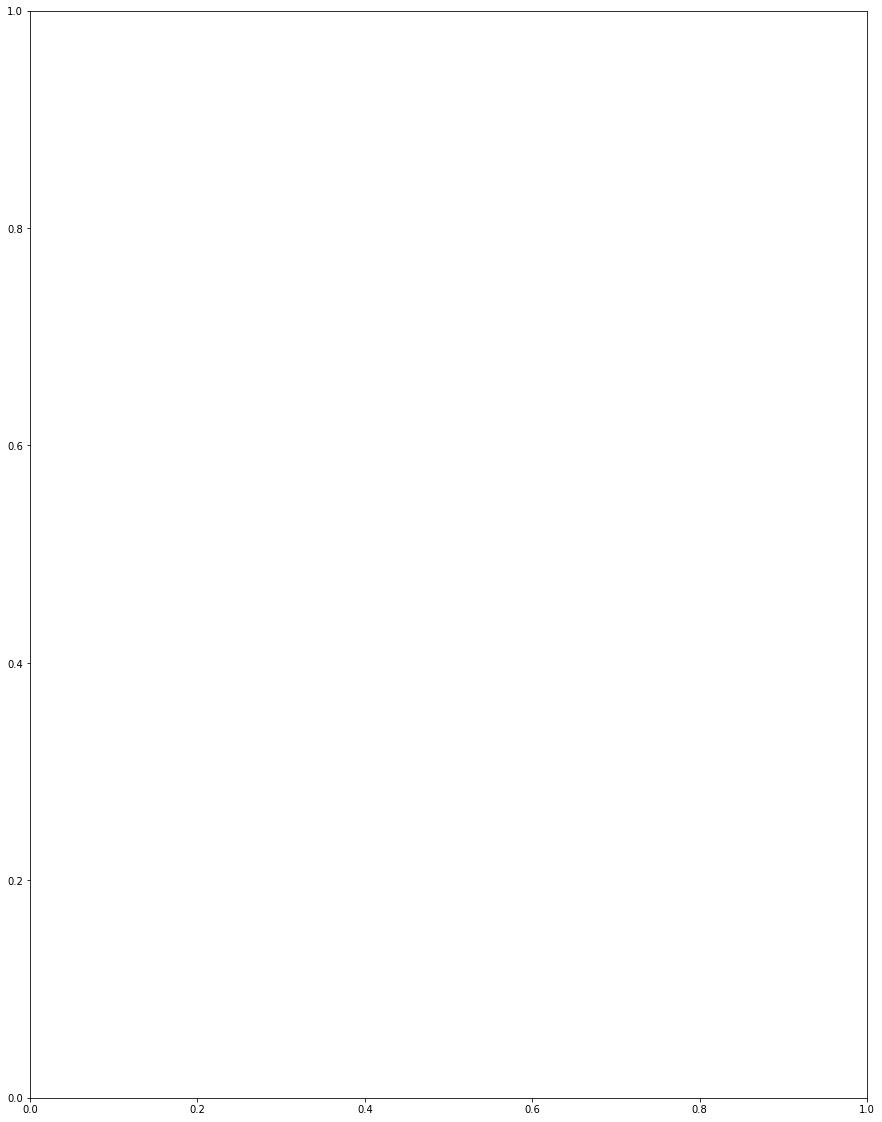

In [130]:
plt.figure(figsize=(15,20))
plt.subplot(1,1,1)
plt.plot(dataAapl[[' predicted',' today']])
plt.ylabel('price off aapl')
plt.title('Prix prédit et vrai valeur de aapl')
plt.legend(['predicted','real'])